<a href="https://colab.research.google.com/github/mabatalim/ItTralee_ML/blob/main/Mariana_Batalim_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning/Data for IoT Portfolio**


Mariana Batalim Pazinatto

T00215868

**Machine Learning Applied to Predictive Maintenance**

# Introduction

Every day we rely on a wide range of machines, but every machine eventually breaks down unless it’s being maintained. Predictive maintenance aims to optimize the balance between corrective and preventive maintenance by enabling just in time replacement of components or maintenance actions. This approach minimizes the cost of unscheduled maintenance and maximizes the component’s lifespan, thus getting more value out of a part and equipment.

Predictive maintenance has clear advantages over other types of maintenance and it is widely applicable. 
Predictive maintenance lets you estimate when machine failure will occur and we can plan maintenance in advance. Implementing predictive maintenance helps reduce downtime, optimize spare parts inventory, and maximize equipment lifetime. 
It is based on continuous monitoring of a machine or process integrity, allowing maintenance to be performed only when necessary. It allows the early detection of failures thanks to predictive tools based on historical data with machine learning techniques, statistical inference methods, and other engineering approaches. Machine learning can make your life easier by automatically finding the hidden patterns in your data.
  
The output from the machine learning project will be a model capable to determine if the equipment likely to failure (break) in the next “X” days/hours and the estimate time to failure (TTF / RUL).


This project dataset is a real life data set from sensors installed in two vacuum pumps, operating under similar condition and as part of the same operating system.

**Equipment information:**
*  Pump Manufacturer: Busch 
*  Model: Cobra NC 0300B
*  Pump type: Screw Vacuum Pump
*  Dimensions: 	1279 x 520 x 914 mm
* Pump Speed/capacity: 320 m³/h

**Operation overview:**

Two screw rotors inside the cylinder of the COBRA NC rotate in opposite directions. The pumped medium is trapped between the cylinder and screw chambers, compressed, and transported to the gas outlet. During the compression process the screw rotors do not come into contact with each other or the cylinder. Thus, no lubricants or operating fluids are required in the compression chamber. COBRA NC series vacuum pumps use efficient Glycol cooling resulting in an even temperature distribution throughout the pump body, and guaranteeing thermal stability throughout the process.

*Source: https://www.buschvacuum.com/ie/en/products/cobra-industry/cobra-nc/cobra-nc-0100-0300-b*

The data was collected from Osisoft PI, using Osisoft PI Datalink.


> PI System is an integrated portfolio of software to collect, store, view, analyze, and share operational data with users within and beyond the enterprise. *Source: https://www.osisoft.com/pi-system/*

> PI DataLink is a Microsoft Excel add-in that enables you to retrieve information from your PI System directly into a spreadsheet. *Source: https://techsupport.osisoft.com/Products/Client-Products/PI-DataLink*


# Dataset


For this project, we are using Threshold Data to Estimate the TTF (Time to failure). All threshold values are based on the PLC (program logic controller) logic, and all the failures were labeled based on those.

Failures:
* Inlet temperature >60, = Failure (High Inlet temperature)
* Housing temperature >130, = Failure (High Housing temperature)
* Discharge temperature >150, = Failure (High Housing temperature)
* Vibration >0.5,  = Failure (High Vibration)
* Barrier Gas Flow switch == 0, = Failure (Barrier Gas low flow)
Purge Gas Flow switch == 0, = Failure (Purge Gas low flow)
* Ballast Gas Flow switch == 0, = Failure (Ballast Gas low flow)

## **Import libraries** 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from google.colab import files
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

## **Import Dataset**

Importing Data from Local System

In [2]:
# Read the CSV file.
uploaded = files.upload()


Saving VP DATASET CLEAN3.csv to VP DATASET CLEAN3.csv


In [3]:
#Read the data using a library (Pandas):
vp_data = pd.read_csv("VP DATASET CLEAN3.csv")

In [ ]:
#preview data
vp_data[1:11]

,Date,Equipment,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,CONDITION,Fault LABEL,Fault (Y/N),TTF
1,01/01/2020 00:05,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221860
2,01/01/2020 00:10,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221855
3,01/01/2020 00:15,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221850
4,01/01/2020 00:20,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221845
5,01/01/2020 00:25,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221840
6,01/01/2020 00:30,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221835
7,01/01/2020 00:35,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221830
8,01/01/2020 00:40,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221825
9,01/01/2020 00:45,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221820
10,01/01/2020 00:50,VP-1132,7.234,7.234,7.191,-12.508,0.0001,STOP,NO FAULT,0,221815


In [ ]:
vp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958964 entries, 0 to 958963
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   958964 non-null  object 
 1   Equipment              958964 non-null  object 
 2   Inlet Temperature      958964 non-null  float64
 3   Housing temperature    958964 non-null  float64
 4   Discharge Temperature  958964 non-null  float64
 5   Discharge Pressure     958964 non-null  float64
 6   Vibration              958964 non-null  float64
 7   CONDITION              958964 non-null  object 
 8   Fault LABEL            958964 non-null  object 
 9   Fault (Y/N)            958964 non-null  int64  
 10  TTF                    958964 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 80.5+ MB


## **Dataset overview and basic statistics**

###Dataset overview

Dataset contains 958964 instances (rows) and 11 attributes (columns)

In [ ]:
# shape 
print(vp_data.shape)

(958964, 11)


There are 2 machines in the data set: VP-1082 and VP-1132

In [ ]:
#function returns a GroupBy object, but essentially describes how the CONDITION of the original data set has been split
vp_data.groupby(['Equipment']).groups.keys()

dict_keys(['VP-1082', 'VP-1132'])

The dataset can be summarized based on the attributes as per below:

In [ ]:
#Summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles
vp_data.describe()

,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,Fault (Y/N),TTF
count,958964.000000,958964.000000,958964.000000,958964.000000,958964.000000,958964.000000,958964.000000
mean,20.385428,76.230973,54.466157,-3.693366,0.024016,0.000234,82103.643651
std,8.141664,44.330348,30.836179,11.701695,0.017767,0.015282,76284.127172
min,-1.514000,-0.112000,-0.104000,-12.694000,-0.000900,0.000000,0.000000
25%,14.108000,17.942000,17.434000,-12.460000,0.000900,0.000000,19975.000000
50%,20.974000,105.526000,65.629000,-4.354000,0.034100,0.000000,57530.000000
75%,26.425000,109.446000,79.476000,0.582000,0.037200,0.000000,124145.000000
max,336.572000,335.220000,337.880000,294.418000,0.458800,1.000000,334450.000000


###Data Distribution

Pump condition data is distributed into 3 categories: "Fault", "Running" and "Stop"

In [ ]:
#function returns a GroupBy object, but essentially describes how the CONDITION of the original data set has been split
vp_data.groupby(['CONDITION']).groups.keys()

dict_keys(['FAULT', 'RUNNING', 'STOP'])

It appears that out of 958,964 records, we only have 224 failures. This corresponds to a failure rate of about 0.023%. In other words, for every failure we have over 907 non-failures. It means the data is very imbalanced. 

This issue is due to following:

* The failure events usually rarely occurs compared to normal operation state for an in-service asset.
* Because machines generally last a long time, we typically do not have many examples of failure. 
* The business cannot afford to let the asset run-to-failure, as it is at the cost of equipment damage and equipment down time.

This means the data sets we use in Predictive Maintenance are almost always imbalanced.

In [ ]:
# CONDITION distribution
print(vp_data.groupby('CONDITION').size())

CONDITION
FAULT         224
RUNNING    755512
STOP       203228
dtype: int64


Data Distribution per Machine:

In [ ]:
# CONDITION distribution per Equipment
vp_data.groupby(['Equipment', 'CONDITION'])['CONDITION'].count()

Equipment  CONDITION
VP-1082    FAULT           107
           RUNNING      377757
           STOP         101619
VP-1132    FAULT           117
           RUNNING      377755
           STOP         101609
Name: CONDITION, dtype: int64

###Fault Distribution

All "Fault" conditions are labelled (Fault Type), as demonstrated below:

In [ ]:
# Fault distribution per Equipment
vp_data.groupby(['Equipment', 'Fault LABEL'])['CONDITION'].count()

Equipment  Fault LABEL               
VP-1082    Ballast Gas low flow              12
           Barrier Gas low flow              22
           High Discharge temperature         8
           High Housing temperature          36
           High Inlet temperature             9
           NO FAULT                      479376
           Purge Gas low flow                20
VP-1132    Ballast Gas low flow               7
           Barrier Gas low flow              27
           High Discharge temperature         8
           High Housing temperature          29
           High Inlet temperature            21
           NO FAULT                      479364
           Purge Gas low flow                25
Name: CONDITION, dtype: int64

In [ ]:
vp_data.groupby(['CONDITION', 'Fault LABEL'])['CONDITION'].count()

CONDITION  Fault LABEL               
FAULT      Ballast Gas low flow              19
           Barrier Gas low flow              49
           High Discharge temperature        16
           High Housing temperature          65
           High Inlet temperature            30
           Purge Gas low flow                45
RUNNING    NO FAULT                      755512
STOP       NO FAULT                      203228
Name: CONDITION, dtype: int64

####Pareto Chart

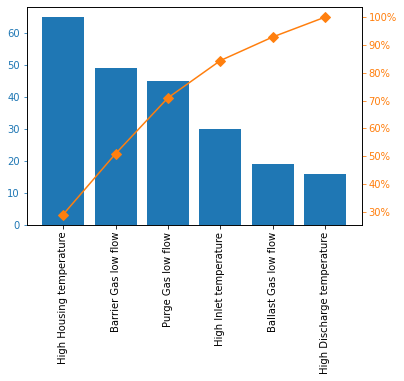

In [ ]:
# FAULT distribution
# Pareto chart based on figures calculated above


df = pd.DataFrame({'Failures': [19, 49, 16, 65, 30, 45]})
df.index = ['Ballast Gas low flow', 'Barrier Gas low flow', 'High Discharge temperature', 'High Housing temperature', 'High Inlet temperature', 'Purge Gas low flow']
df = df.sort_values(by='Failures',ascending=False)
df["cumpercentage"] = df["Failures"].cumsum()/df["Failures"].sum()*100

fig, ax = pyplot.subplots()
ax.bar(df.index, df["Failures"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

pyplot.show()

###Histograms and Plots

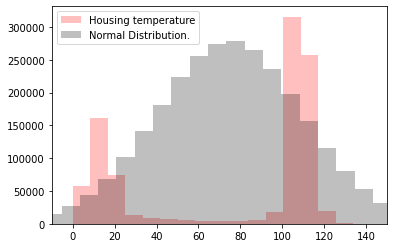

In [34]:
# Create histograms to visualise the distribution of house prices
from pylab import xticks
FAILURE1 = vp_data['Housing temperature']

pyplot.hist(FAILURE1, bins=40, color='red', alpha=0.25, label="Housing temperature")
pyplot.xlim(xmin=-10, xmax = 150)
pyplot.hist(np.random.normal(75, 35, 2800000), color='k', alpha=0.25, bins = 40, label = "Normal Distribution.")
pyplot.legend()
pyplot.show()

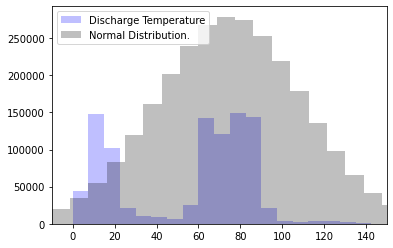

In [35]:
# Create histograms to visualise the distribution of house prices
FAILURE2 = vp_data['Discharge Temperature']

pyplot.hist(FAILURE2, bins=45, color='blue', alpha=0.25, label="Discharge Temperature")
pyplot.xlim(xmin=-10, xmax = 150)
pyplot.hist(np.random.normal(75, 35, 2800000), color='k', alpha=0.25, bins = 40, label = "Normal Distribution.")
pyplot.legend()
pyplot.show()

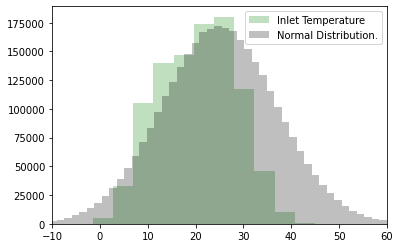

In [58]:
# Create histograms to visualise the distribution of house prices
FAILURE3 = vp_data['Inlet Temperature']

pyplot.hist(FAILURE3, bins=80, color='green', alpha=0.25, label="Inlet Temperature")
pyplot.xlim(xmin=-10, xmax = 60)
pyplot.hist(np.random.normal(25, 12, 3300000), color='k', alpha=0.25, bins = 80, label = "Normal Distribution.")
pyplot.legend()
pyplot.show()

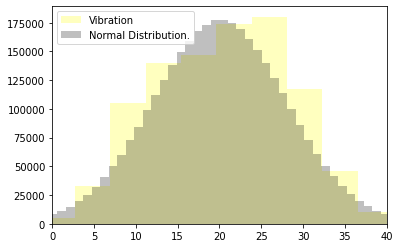

In [63]:
FAILURE4 = vp_data['Vibration']

pyplot.hist(FAILURE3, bins=80, color='yellow', alpha=0.25, label="Vibration")
pyplot.xlim(xmin=0, xmax = 40)
pyplot.hist(np.random.normal(20, 8, 3500000), color='k', alpha=0.25, bins = 80, label = "Normal Distribution.")
pyplot.legend()
pyplot.show()

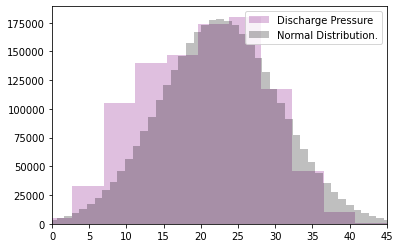

In [67]:
FAILURE4 = vp_data['Discharge Pressure']

pyplot.hist(FAILURE3, bins=80, color='purple', alpha=0.25, label="Discharge Pressure")
pyplot.xlim(xmin=0, xmax = 45)
pyplot.hist(np.random.normal(22.5, 8, 3500000), color='k', alpha=0.25, bins = 80, label = "Normal Distribution.")
pyplot.legend()
pyplot.show()

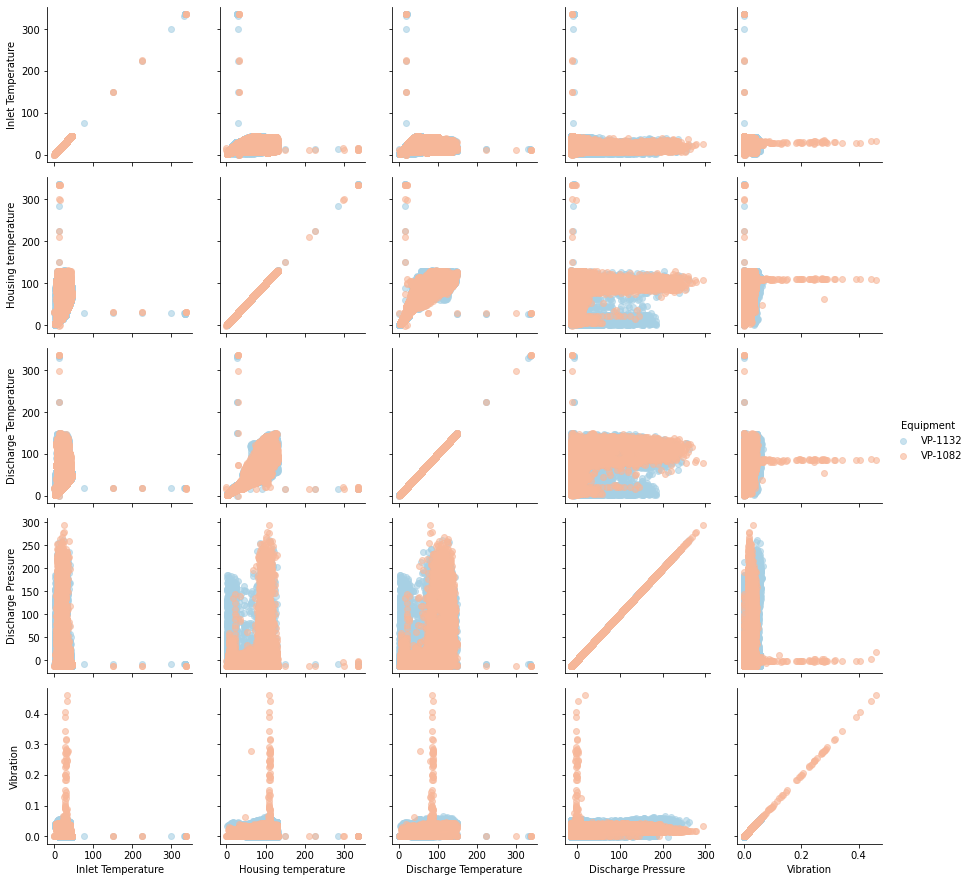

In [ ]:
#Scatterplot overview, for the 2 different equipment (VP-1132 and VP-1082)

g = sns.PairGrid(vp_data, vars=['Inlet Temperature', 'Housing temperature', 'Discharge Temperature', 'Discharge Pressure',  'Vibration'],
                 hue='Equipment', palette='RdBu_r')
g.map(pyplot.scatter, alpha=0.6)
g.add_legend();

#both pump's behavior very similar

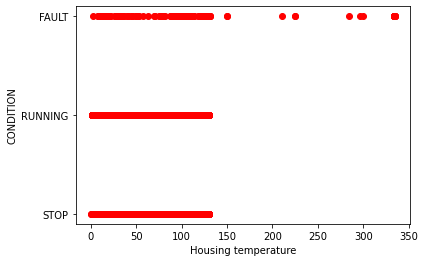

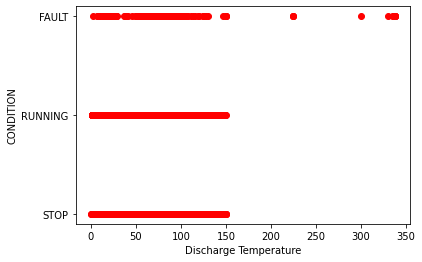

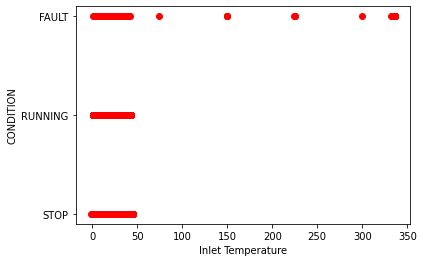

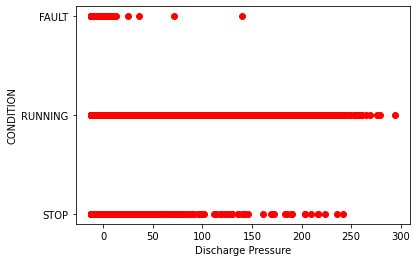

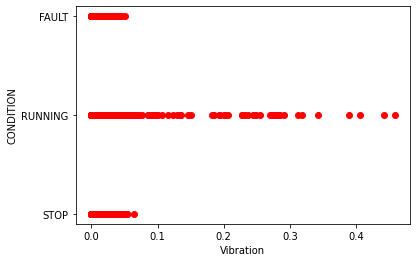

In [ ]:
#Plots for pump condition vs sensors readings
#This graphs help to understand the thresholds.
#Failure labels were created based on thresholds. A value above that threshold indicates a failure.


pyplot.ylabel("CONDITION")
pyplot.xlabel("Housing temperature")
pyplot.scatter(vp_data["Housing temperature"],vp_data["CONDITION"], c='red')
pyplot.show()

pyplot.ylabel("CONDITION")
pyplot.xlabel("Discharge Temperature")
pyplot.scatter(vp_data["Discharge Temperature"],vp_data["CONDITION"], c='red')
pyplot.show()

pyplot.ylabel("CONDITION")
pyplot.xlabel("Inlet Temperature")
pyplot.scatter(vp_data["Inlet Temperature"],vp_data["CONDITION"], c='red')
pyplot.show()


pyplot.ylabel("CONDITION")
pyplot.xlabel("Discharge Pressure")
pyplot.scatter(vp_data["Discharge Pressure"],vp_data["CONDITION"], c='red')
pyplot.show()

pyplot.ylabel("CONDITION")
pyplot.xlabel("Vibration")
pyplot.scatter(vp_data["Vibration"],vp_data["CONDITION"], c='red')
pyplot.show()

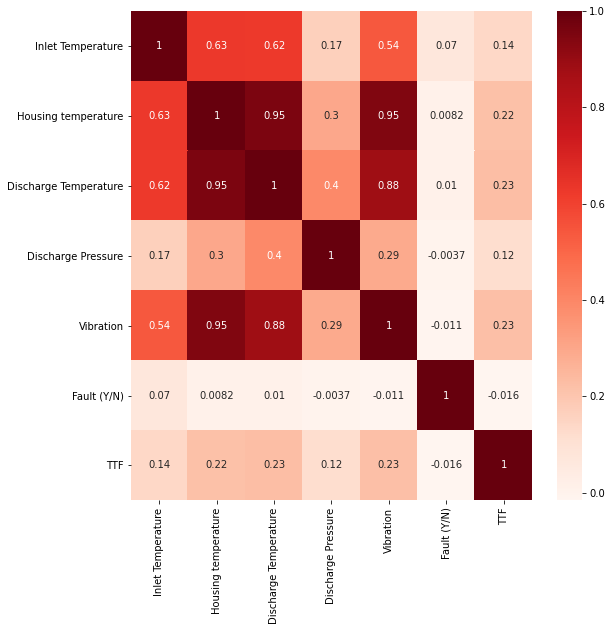

In [70]:
#correlation heatmap, in red colours

pyplot.figure(figsize=(9,9))
sns.heatmap(vp_data.corr(),annot=True, cmap="Reds")

##Data Preparation for ML

Create a new dataflame for the ML model 

In [4]:
#Creating a new DataFrame

vp_data2 = pd.read_csv("VP DATASET CLEAN3.csv")

Rename columns, drop Date column and replace texts (objects) for numbers (int)

In [5]:
vp_data2 = vp_data2.rename(columns={'Fault LABEL': 'Fault'})

In [6]:
del vp_data2['Date']

In [7]:
vp_data2.loc[(vp_data2.Equipment == 'VP-1132'),'Equipment']=1
vp_data2.loc[(vp_data2.Equipment == 'VP-1082'),'Equipment']=2


vp_data2.loc[(vp_data2.CONDITION == 'STOP'),'CONDITION']=0
vp_data2.loc[(vp_data2.CONDITION == 'RUNNING'),'CONDITION']=1
vp_data2.loc[(vp_data2.CONDITION == 'FAULT'),'CONDITION']=2

vp_data2.loc[(vp_data2.Fault == 'NO FAULT'),'Fault']=0
vp_data2.loc[(vp_data2.Fault == 'Purge Gas low flow'),'Fault']=1
vp_data2.loc[(vp_data2.Fault == 'High Inlet temperature'),'Fault']=2
vp_data2.loc[(vp_data2.Fault == 'High Housing temperature'),'Fault']=3
vp_data2.loc[(vp_data2.Fault == 'High Discharge temperature'),'Fault']=4
vp_data2.loc[(vp_data2.Fault == 'Barrier Gas low flow'),'Fault']=5
vp_data2.loc[(vp_data2.Fault == 'Ballast Gas low flow'),'Fault']=6



Convert object into numeric

In [8]:
vp_data2['Equipment'].astype(str).astype(int)
vp_data2['CONDITION'].astype(str).astype(int)
vp_data2['Fault'].astype(str).astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
958959    0
958960    0
958961    0
958962    0
958963    0
Name: Fault, Length: 958964, dtype: int64

In [9]:
#replace infinite values for Nan and NaN values with the mean:

vp_data2.replace([np.inf, -np.inf], np.nan)
vp_data2.fillna(vp_data2.mean())


,Equipment,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,CONDITION,Fault,Fault (Y/N),TTF
0,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221865
1,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221860
2,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221855
3,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221850
4,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221845
...,...,...,...,...,...,...,...,...,...,...
958959,2,20.595,108.409,80.148,-4.649,0.0356,1,0,0,25
958960,2,20.595,108.301,80.148,-4.268,0.0354,1,0,0,20
958961,2,20.595,108.301,80.084,-3.433,0.0347,1,0,0,15
958962,2,20.595,108.373,80.113,-4.149,0.0359,1,0,0,10


In [ ]:
np.isnan(vp_data2.any())

Equipment                False
Inlet Temperature        False
Housing temperature      False
Discharge Temperature    False
Discharge Pressure       False
Vibration                False
CONDITION                False
Fault                    False
Fault (Y/N)              False
TTF                      False
dtype: bool

In [ ]:
#No inf values
np.isfinite(vp_data2.all())

Equipment                True
Inlet Temperature        True
Housing temperature      True
Discharge Temperature    True
Discharge Pressure       True
Vibration                True
CONDITION                True
Fault                    True
Fault (Y/N)              True
TTF                      True
dtype: bool

In [ ]:
vp_data2.head()

,Equipment,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,CONDITION,Fault,Fault (Y/N),TTF
0,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221865
1,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221860
2,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221855
3,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221850
4,1,7.234,7.234,7.191,-12.508,0.0001,0,0,0,221845


# Build Models

For this project, we will build 2 different models:

*   Classification models to predict failure within a given time window
*   Regression models to predict remaining time to failure (TTF) in minutes (also called Remaining useful lifetime - RUL).

In general, what regression and classification models are doing is modelling the relationship between features and the degradation path of the system. That means that if the model is applied to a system that will exhibit a different type of failure not present in the training data, the model will fail to predict it.

### Classification Models to predict failure within a given time window

It can be extremely challenging to create a model that can accurately predict the lifetime of a machine. However, in reality, often the maintenance team only needs to know if the machine will fail anytime soon. In order to do so, we can use the classification model to predict a failure within the next 'N' minutes (where N = any number).

For this project we will try to predict if a machine fails in the next **60 minutes**. 

In this case, we will use a classification model.

Classification models can deal with multiple types of failure, as long as they are framed as a multi-class problem. Predictive maintenance makes use of multi-class classification since there are multiple possible causes for the failure of a machine or component.

Multi-class classification techniques can be used for two scenarios:

*   The first outcome is a range of time to failure for an asset. The asset is assigned to one of multiple possible periods. The second outcome is the likelihood of failure in a future period due to one of the multiple root causes. This prediction enables the maintenance crew to watch for symptoms and plan maintenance schedules.


#### Shuffle and Split the dataset


Before split the data, we will shuffle the data.

In [10]:
#create shuffled dataset
data_shuffled1 = vp_data2.sample(frac=1.0, random_state=0)

In [11]:
#preview shuffled data
data_shuffled1.head()

,Equipment,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,CONDITION,Fault,Fault (Y/N),TTF
627643,2,24.916,105.812,77.352,12.861,0.0368,1,0,0,28460
556340,2,5.797,6.083,5.868,-5.593,0.0012,0,0,0,10175
134023,1,12.148,12.205,11.841,-7.606,0.0004,0,0,0,12585
913246,2,6.884,7.721,7.384,-3.161,0.0011,0,0,0,46635
651075,2,19.158,103.910,74.834,3.514,0.0354,1,0,0,101435


To predict the failure within 60 min, first we will add a new column to 'data_shuffled1' to indicate if the pump will fail within 60 minutes based on the time to failure 'TTF' column. Where 'TTF' = Time to Failure in minutes

In [12]:
data_shuffled1['Fail within 60min'] = np.where(data_shuffled1['TTF'] > 60, 0, 1)
data_shuffled1.head()

,Equipment,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,CONDITION,Fault,Fault (Y/N),TTF,Fail within 60min
627643,2,24.916,105.812,77.352,12.861,0.0368,1,0,0,28460,0
556340,2,5.797,6.083,5.868,-5.593,0.0012,0,0,0,10175,0
134023,1,12.148,12.205,11.841,-7.606,0.0004,0,0,0,12585,0
913246,2,6.884,7.721,7.384,-3.161,0.0011,0,0,0,46635,0
651075,2,19.158,103.910,74.834,3.514,0.0354,1,0,0,101435,0


We will remove some unnecessary columns to facilitate the analysis.

In [13]:
selected_columns1 = ['Inlet Temperature', 'Housing temperature', 'Discharge Temperature', 'Discharge Pressure', 'Vibration','Fail within 60min']
data_shuffled1 = data_shuffled1[selected_columns1]
data_shuffled1 = data_shuffled1.dropna()
data_shuffled1.head()

,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,Fail within 60min
627643,24.916,105.812,77.352,12.861,0.0368,0
556340,5.797,6.083,5.868,-5.593,0.0012,0
134023,12.148,12.205,11.841,-7.606,0.0004,0
913246,6.884,7.721,7.384,-3.161,0.0011,0
651075,19.158,103.910,74.834,3.514,0.0354,0


In [14]:
data_shuffled1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958964 entries, 627643 to 305711
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Inlet Temperature      958964 non-null  float64
 1   Housing temperature    958964 non-null  float64
 2   Discharge Temperature  958964 non-null  float64
 3   Discharge Pressure     958964 non-null  float64
 4   Vibration              958964 non-null  float64
 5   Fail within 60min      958964 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 51.2 MB


In [15]:
data_shuffled1.head()

,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,Fail within 60min
627643,24.916,105.812,77.352,12.861,0.0368,0
556340,5.797,6.083,5.868,-5.593,0.0012,0
134023,12.148,12.205,11.841,-7.606,0.0004,0
913246,6.884,7.721,7.384,-3.161,0.0011,0
651075,19.158,103.910,74.834,3.514,0.0354,0


#### Create a Validation Dataset

Split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [16]:
# Separate the input and output columns.
X = data_shuffled1.drop('Fail within 60min', axis=1)
# For the output, we'll use the Fail within 60min column
Y = data_shuffled1['Fail within 60min']


In [17]:
# Partition the data into training and test sets.
# Split the data set into training set and test set, with 80% and 20% respectively. 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

Now we have training data in the Xtrain and Ytrain for preparing models and a Xtest and Ytest sets that we can use later.
As expected, we can see that there are 958964 rows of data with 5 input variables and the dataset is split into train and test sets and we can see that there are 767171 rows for training and 191793 rows for the test set.

In [ ]:
# summarizes X and Y shape
print(X.shape, Y.shape)

# summarizes Xtrain, Xtest, Ytrain, Ytest
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(958964, 5) (958964,)
(767171, 5) (191793, 5) (767171,) (191793,)


#### Classification Models

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier(strategy='most_frequent')
cross_val_score(clf, Xtrain, Ytrain)



array([0.99785577, 0.99786227, 0.99785576, 0.99785576, 0.99785576])

#####The Tree-based classifier using DecisionTreeClassifier

In [58]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

dtc = tree.DecisionTreeClassifier()
dtc.fit(Xtrain, Ytrain)
dtc_acc = cross_val_score(dtc, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
dtc_recall = cross_val_score(dtc, Xtrain, Ytrain, cv=5, scoring='recall').mean()

print("DecisionTreeClassifier Accuracy =", dtc_acc)
print("DecisionTreeClassifier Recall =", dtc_recall)

DecisionTreeClassifier Accuracy = 0.9977280164230942
DecisionTreeClassifier Recall = 0.45561939357995407


##### The Tree-based classifier using RandomForestClassifier

In [57]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
rcf_acc = cross_val_score(rfc, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
rcf_recall = cross_val_score(rfc, Xtrain, Ytrain, cv=5, scoring='recall').mean()

print("RandomForestClassifier Accuracy =", rcf_acc)
print("RandomForestClassifier Recall =", rcf_recall)

RandomForestClassifier Accuracy = 0.9984384186077204
RandomForestClassifier Recall = 0.29683816443027655


#####The Tree-based classifier using GradientBoostingClassifier

In [121]:
from sklearn import ensemble
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(Xtrain, Ytrain)
gbc_acc = cross_val_score(gbc, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
gbc_recall = cross_val_score(gbc, Xtrain, Ytrain, cv=5, scoring='recall').mean()

print("GradientBoostingClassifier Accuracy =", gbc_acc)
print("GradientBoostingClassifier Recall =", gbc_recall)

GradientBoostingClassifier = 0.9979144154556694
GradientBoostingClassifier = 0.09488286752168433


#####Linear classifier using Perceptron

In [122]:
from sklearn import linear_model
lmp = linear_model.Perceptron()
lmp.fit(Xtrain, Ytrain)
lmp_acc = cross_val_score(lmp, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
lmp_recall = cross_val_score(lmp, Xtrain, Ytrain, cv=5, scoring='recall').mean()

print("Linear Model Perceptron Accuracy =", lmp_acc)
print("Linear Model Perceptron Recall =", lmp_recall)

Linear Model Perceptron Accuracy = 0.9978635793164884
Linear Model Perceptron Recall = 0.0030432204018088814


#####Linear classifier using LogisticRegression

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lclr = LogisticRegression(solver='newton-cg', max_iter=5000)
lclr = lclr.fit(Xtrain,Ytrain)
lclr_acc = cross_val_score(lclr, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
lclr_recall = cross_val_score(lclr, Xtrain, Ytrain, cv=5, scoring='recall').mean()

print("LogisticRegression Accuracy =", lclr_acc)
print("LogisticRegression Recall =", lclr_recall)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line 

LogisticRegression Accuracy = 0.99788052468772
LogisticRegression Recall = 0.01095522277411224


#####Linear classifier using LinearSVC

In [125]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

svc = svm.LinearSVC(max_iter=5000)
svc.fit(Xtrain, Ytrain)
svc_acc = cross_val_score(svc, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
svc_recall = cross_val_score(svc, Xtrain, Ytrain, cv=5, scoring='recall').mean()

print("LinearSVC Accuracy =", svc_acc)
print("LinearSVC Recall =", svc_recall)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

LinearSVC Accuracy = 0.9978570618562124
LinearSVC Recall = 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#####Linear classifier using MLPClassifier

In [131]:
from sklearn import neural_network
mlp = neural_network.MLPClassifier()
mlp.fit(Xtrain, Ytrain)
mpl_acc = cross_val_score(mlp, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
mpl_recall = cross_val_score(mlp, Xtrain, Ytrain, cv=5, scoring='recall').mean()

print("MLPClassifier Accuracy =", mpl_acc)
print("MLPClassifier Recall =", mpl_recall)

MLPClassifier Accuracy = 0.9979287538257999
MLPClassifier Recall = 0.036503817925717254


####Final Evaluation

#####Select Model

Models were evaluated based on the Accuracy and Recall. According to step above, the best **accuracy score** were made using **RandomForestClassifier** and best **Recall Score** using **DecisionTreeClassifier**:
* DecisionTreeClassifier Accuracy = 99.77%
* **DecisionTreeClassifier Recall = 45.56%**
* **RandomForestClassifier Accuracy = 99.84%**
* RandomForestClassifier Recall = 29.68%

As the dataset is very imbalanced, we will evaluate both models (Decision Tree Classifier and RandomForestClassifier) in the cross-validation evaluation, we will train it on the whole training set and evaluate it on the held-out test set.

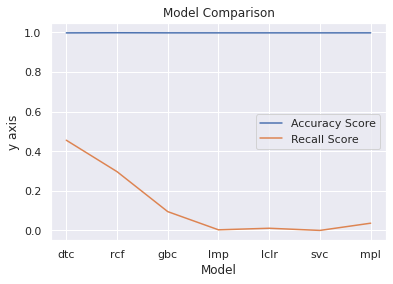

In [177]:

x  = ["dtc", "rcf", "gbc", "lmp", "lclr", "svc", "mpl"]
y1 = [dtc_acc, rcf_acc, gbc_acc, lmp_acc, lclr_acc, svc_acc, mpl_acc]
y2 = [dtc_recall, rcf_recall, gbc_recall, lmp_recall, lclr_recall, svc_recall, mpl_recall]
y1label = [dtc_acc, rcf_acc, gbc_acc, lmp_acc, lclr_acc, svc_acc, mpl_acc]

pyplot.plot(x, y1, label="Accuracy Score")
pyplot.plot(x, y2, label="Recall Score")
pyplot.plot()

pyplot.xlabel("Model")
pyplot.ylabel("y axis")
pyplot.title("Model Comparison")
pyplot.legend()
pyplot.show()


#####Evaluate Predictions

Now we have found classifiers that gives a high recall and good accuracy in the cross-validation evaluation, we will train it on the whole training set and evaluate it on the held-out test set. 

######Evaluate Model on the held-out test set

In [181]:
# Evaluate predictions Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report

dtc = ensemble.RandomForestClassifier()
dtc.fit(Xtrain, Ytrain)
y_scores_rfc = dtc.predict_proba(Xtest)[:, 1]
dtc_y_p = dtc.predict(Xtest)

acc1 = accuracy_score(Ytest,dtc_y_p)
recall1 = recall_score(Ytest,dtc_y_p)
precision1 = precision_score(Ytest,dtc_y_p)
report1 = classification_report(Ytest,dtc_y_p)

print(acc1)
print(recall1)
print(precision1)
print(report1)

0.9985140229309725
0.3841059602649007
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    191340
           1       0.97      0.38      0.55       453

    accuracy                           1.00    191793
   macro avg       0.98      0.69      0.77    191793
weighted avg       1.00      1.00      1.00    191793



In [28]:
# Evaluate predictions RandomForestClassifier
from sklearn import ensemble
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report

rfc = ensemble.RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
y_scores_rfc = rfc.predict_proba(Xtest)[:, 1]
y_p = rfc.predict(Xtest)

acc1 = accuracy_score(Ytest,y_p)
recall1 = recall_score(Ytest,y_p)
precision1 = precision_score(Ytest,y_p)
report1 = classification_report(Ytest,y_p)

print(acc1)
print(recall1)
print(precision1)
print(report1)

0.9985035950217162
0.37527593818984545
0.9770114942528736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    191340
           1       0.98      0.38      0.54       453

    accuracy                           1.00    191793
   macro avg       0.99      0.69      0.77    191793
weighted avg       1.00      1.00      1.00    191793



Based on the evaluation performed above, **Random Forest Classifier** seems to be the best model to choose, as it has the highest accuracy (99,85%) and the recall score came up as the same than Decision Tree Classifier on the test set (38%).

######Confusion Matrix

In [190]:
# confusion_matrix RandomForestClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, y_p)

array([[191336,      4],
       [   283,    170]])

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. What can we learn from this matrix?

There are two possible predicted classes: "yes" and "no". As we were predicting the presence of failure within 60 min, "yes" would mean a failure, and "no" would mean no failure.
The classifier made a total of 191793 predictions.
Out of those 191793 cases, the classifier predicted "yes" 174 times, and "no" 191619 times when in reality it would be 453 "Yes" and 191340 "No".

This gives us:
* TP “true positive” for correctly predicted event values = 170
* FP “false positive” for incorrectly predicted event values = 4
* TN “true negative” for correctly predicted no-event values = 191336
* FN “false negative” for incorrectly predicted no-event values = 283

A false positive is “Unecessary Maintenance”. A true positive is “Timely and Appropriate Maintenance”. A false negative is “Machine Runs to Failure”.


This is a list of rates that are often computed from the confusion matrix:

*  Accuracy: (TP+TN)/total =  0.9985
* Misclassification Rate ("Error Rate"): (FP+FN)/total = 0.001496 
* True Positive Rate ("Recall"): TP/actual yes = 0.38
* False Positive Rate: FP/actual no = 0.000021
*	True Negative Rate ("Specificity"): TN/actual no = 50/60 = 0.999979 
*	Precision: TP/predicted yes = 0.9770
*	Prevalence: actual yes/total = 0.0023
*	F Score: 2 x [(Precision x Recall)/(Precision + Recall)] = 0.54

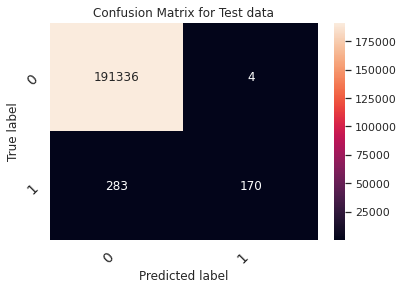

In [188]:
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = pyplot.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.title('Confusion Matrix for {0}'.format(dtype))

plot_conf_matrix(confusion_matrix(Ytest, y_p), "Test data")

######PR Curve and ROC Curve

Compare the plots of the PR curve and ROC curve.

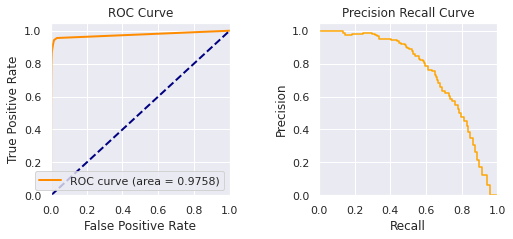

In [187]:
# Get ROC curve FPR and TPR from true labels vs score values
#RandomForestClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

y_scores_rfc = rfc.predict_proba(Xtest)[:, 1]
fpr, tpr, _ = roc_curve(Ytest, y_scores_rfc)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(Ytest, y_scores_rfc)

pyplot.figure(figsize=(8, 3))

pyplot.subplot(1,2,1)
lw = 2
pyplot.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
pyplot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.legend(loc="lower right")
pyplot.grid(True)

pyplot.subplot(1,2,2)
pyplot.step(recall, precision, color='orange', where='post')
# pyplot.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.ylim([0.0, 1.05])
pyplot.xlim([0.0, 1.0])
pyplot.title('Precision Recall Curve')
pyplot.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
pyplot.subplots_adjust(left, bottom, right, top, wspace, hspace)
pyplot.show()

### Regression models to predict time to failure (TTF) / remaining useful lifetime (RUL)

In manufacturing, regression can be used to calculate an estimate for the Remaining Useful Life (RUL) of an asset.

For regression, the most commonly used machine learning algorithm is Linear Regression, being fairly quick and simple to implement, with output that is easy to interpret. 

Regression is used when data exists within a range (eg. temperature, weight), which is often the case when dealing with data collected from sensors and we usually model only one type of “path to failure”: if many types of failure are possible and the system’s behavior preceding each one of them differs, one dedicated model should be made for each of them.

As the assets under analysis are maintaining using a preventive maintenance strategy and not a "run to fail" strategy, we don't have enought data to predict the RUL (Remaining Useful Lifetime), therefore we will use the Time to Failure (TTF) data to perform the regression.

#### Shuffle and Split the dataset


Before split the data, we will shuffle the data.

In [66]:
#create shuffled dataset
data_shuffled2 = vp_data.sample(frac=1.0, random_state=0)

#preview shuffled data
data_shuffled2.head()

,Date,Equipment,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,CONDITION,Fault LABEL,Fault (Y/N),TTF
627643,19/12/2025 07:35,VP-1082,24.916,105.812,77.352,12.861,0.0368,RUNNING,NO FAULT,0,28460
556340,15/04/2025 17:40,VP-1082,5.797,6.083,5.868,-5.593,0.0012,STOP,NO FAULT,0,10175
134023,10/04/2021 08:35,VP-1132,12.148,12.205,11.841,-7.606,0.0004,STOP,NO FAULT,0,12585
913246,05/09/2028 23:50,VP-1082,6.884,7.721,7.384,-3.161,0.0011,STOP,NO FAULT,0,46635
651075,10/03/2026 16:15,VP-1082,19.158,103.910,74.834,3.514,0.0354,RUNNING,NO FAULT,0,101435


In [67]:
selected_columns2 = ['Inlet Temperature', 'Housing temperature', 'Discharge Temperature', 'Discharge Pressure', 'Vibration','TTF']
data_shuffled2 = data_shuffled2[selected_columns2]
data_shuffled2 = data_shuffled2.dropna()
data_shuffled2.head()

,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,TTF
627643,24.916,105.812,77.352,12.861,0.0368,28460
556340,5.797,6.083,5.868,-5.593,0.0012,10175
134023,12.148,12.205,11.841,-7.606,0.0004,12585
913246,6.884,7.721,7.384,-3.161,0.0011,46635
651075,19.158,103.910,74.834,3.514,0.0354,101435


In [76]:
#convert TTF(min) to TTF(days) 

data_shuffled2['TTF'] = data_shuffled2['TTF'] / 1440
data_shuffled2.head()

,Inlet Temperature,Housing temperature,Discharge Temperature,Discharge Pressure,Vibration,TTF
627643,24.916,105.812,77.352,12.861,0.0368,19.763889
556340,5.797,6.083,5.868,-5.593,0.0012,7.065972
134023,12.148,12.205,11.841,-7.606,0.0004,8.739583
913246,6.884,7.721,7.384,-3.161,0.0011,32.385417
651075,19.158,103.910,74.834,3.514,0.0354,70.440972


In [77]:
# data_shuffled2 summary 
data_shuffled2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958964 entries, 627643 to 305711
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Inlet Temperature      958964 non-null  float64
 1   Housing temperature    958964 non-null  float64
 2   Discharge Temperature  958964 non-null  float64
 3   Discharge Pressure     958964 non-null  float64
 4   Vibration              958964 non-null  float64
 5   TTF                    958964 non-null  float64
dtypes: float64(6)
memory usage: 51.2 MB


#### Create a Validation Dataset

Split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [78]:
# Separate the input and output columns.
X2 = data_shuffled2.drop('TTF', axis=1)
# For the output, we'll use the Time to Failure
Y2 = data_shuffled2['TTF']

In [79]:
# Partition the data into training and test sets.
# Split the data set into training set and test set, with 80% and 20% respectively. 

Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(X2, Y2, test_size=0.2, random_state=0)

Now we have training data in the Xtrain and Ytrain for preparing models and a Xtest and Ytest sets that we can use later. As expected, we can see that there are 958964 rows of data with 5 input variables and the dataset is split into train and test sets and we can see that there are 767171 rows for training and 191793 rows for the test set.

In [80]:
# summarizes X and Y shape
print(X2.shape, Y2.shape)

# summarizes Xtrain, Xtest, Ytrain, Ytest
print(Xtrain2.shape, Xtest2.shape, Ytrain2.shape, Ytest2.shape)

(958964, 5) (958964,)
(767171, 5) (191793, 5) (767171,) (191793,)


#### Regression Model

We train a baseline dummy regressor (which always predicts the same value) and evaluate it in a cross-validation setting.

In [81]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain2, Ytrain2.astype('int'), scoring='neg_mean_squared_error')

{'fit_time': array([0.02318954, 0.02240419, 0.02214932, 0.02345467, 0.0225327 ]),
 'score_time': array([0.00190425, 0.00176215, 0.00174022, 0.00171733, 0.00177097]),
 'test_score': array([-2796.55477567, -2806.14695297, -2807.07537617, -2814.85299051,
        -2816.24268448])}

Now we will replace the dummy regressor with something more meaningful:

* Linear Regression
* Ridge
* Lasso
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* MLP Regressor



In [82]:
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
classifiers = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor(),
    neural_network.MLPRegressor()
]

for item in classifiers:
    print(item)
    clf = item
    print(cross_validate(clf, Xtrain2, Ytrain2.astype('int'), scoring='neg_mean_squared_error', cv=3)['test_score'].mean())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
-2648.3893942451195
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
-2648.426773073972
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
-2659.102064254243
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
-286.82482469971166
GradientBoostin

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-1767.2940422571967


####Final Evaluation

#####Select Model

According to the negative mean squared error, the best results were made using **RandomForestRegressor** and the error is about **-286.82** [TTF / Days]



#####Evaluate Model on the held-out test set

Finally, train on the full training set and evaluate on the held-out test set.

In [84]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr = ensemble.RandomForestRegressor() 
regr.fit(Xtrain2, Ytrain2)
MSE = mean_squared_error(Ytest2, regr.predict(Xtest2))

y2_pred = regr.predict(Xtest2)
r2 = r2_score(Ytest2, y2_pred)

print('Mean Squared error is ', MSE) 
print('R2 score is ', r2) 

Mean Squared error is  237.36385713169076
R2 score is  0.9151666932004677


#####Mean Squared error and R^2 Score

Mean Squared error is  237.37 and R2 score is  0.91%

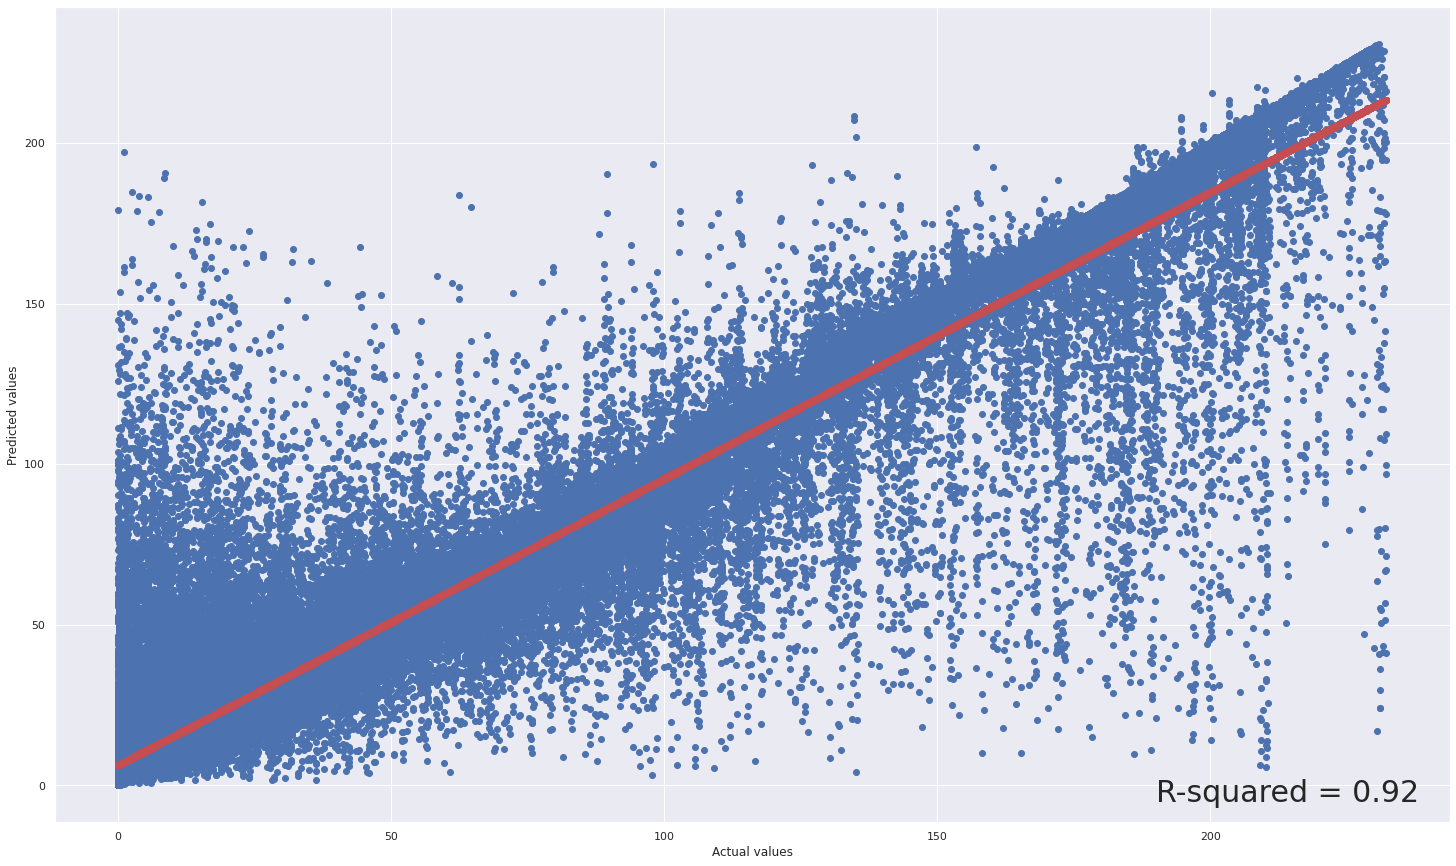

In [120]:
pyplot.figure(figsize=(25,15))
pyplot.plot(Ytest2, y2_pred, 'bo')
pyplot.xlabel('Actual values')
pyplot.ylabel('Predicted values')
pyplot.plot(np.unique(Ytest2), np.poly1d(np.polyfit(Ytest2, y2_pred, 1))(np.unique(Ytest2)), 'ro')

plt.text(190, -5, 'R-squared = %0.2f' % r2, fontsize=30)
plt.show()

#Conclusion

This machine learning project have developed two models capable to determine if the equipment likely to failure in the next 60 minutes and to estimate the time until next failure (TTF). In general, what regression and classification models are doing is modelling the relationship between features and the degradation path of the system. That means that if the model is applied to a system that will exhibit a different type of failure not present in the training data, the model will fail to predict it. (Big Data Republic, 2017).

When modelling for Predictive Maintenance, one needs to address the classic problem of modelling with imbalanced data when only a fraction of the data constitutes failure.  This kind of data poses several issues. While normal operations data (i.e. non-failure data) which constitutes most of the data is similar to each other, failure data may be different from one another. Standard methods for feature selection and feature extraction and construction do not work well for imbalanced data (Rossinsky, 2020).

Creating a model which can predict lifetimes very accurate can be very challenging. In practice however, one usually does not need to predict the lifetime very accurate far in the future. Often the maintenance team only needs to know if the machine will fail ‘soon’ (Big Data Republic, 2017).

Based on the classification model evaluation, Random Forest Classifier seems to be the best model to choose, as it has the highest accuracy with 99,85% and the recall score of 38%. The classification model demonstrated capable to predict the results (fail or not fail within 60 minutes) in an accurate manner, moreover the True Positive Rate (Recall) score still relatively low, which may led to undetected failure. The classification model results can be summarized as:
* True negative is “No maintenance work / machine does not require an intervention”: 99.76%
* A true positive is “Timely and Appropriate Maintenance”: 0.09%
* A false positive is “Unnecessary Maintenance”: 0.002%
* False negative is “Machine Runs to Failure”: 0.15%

Based on the regression model evaluation, Random Forest Classifier seems to be the best model to choose. The regression model is deemed to work, and the r-squared score of 91% indicates a good fit for the model within the data frame, moreover the results cannot easily be utilised by the maintenance department as the TTF (Time to Fail) or Remain Useful live prediction is not accurate, with Mean Squared error of 237.37 days, in other hand, this results may be useful to compare time to fail across other equipment’s within the plant assets. 

In a step further, both models can deployed in a real-time data streaming applications.

This project’s results provide valuable insights to the maintenance department to determine the best moment to act to avoid equipment failures and optimise plant performance by avoid unplanned downtime. 	Based on the models discussed on Item 3 and results mentioned on the item 4, it is understand that maintenance resources, plant utilization and plant availability can be optimised and the equipment will not be over-maintained neither under-maintained. And it has demonstrated Machine learning can be successfully applied to optimise maintenance strategies and asset performance, with proven capability to reduce costs, optimise plant performance and resources

Both models analysed as part of this project seem to be useful for a PdM perspective, especially the classification model which seems capable to predict a failure within 60 min. To optimise the maintenance process further, it is recommended to simulate another model capable to predict a failure within a longer time window, such as 24h or even longer and to gather run to fail data to optimise the regression model. Additionally, other models also could be explored such as anomaly detection machine learning models (Flagging anomalous behaviour) or Survival models for the prediction of failure probability over time.



# Reference List and Bibliography

Aithority. How to find the right machine learning techniques for predictive maintenance. Available through: website < https://aithority.com/guest-authors/how-to-find-the-right-machine-learning-techniques-for-predictive-maintenance/> [Accessed 23 Dec 2020]

Amruthnath, N.; Gupta, T. A research study on unsupervised machine learning algorithms for early fault detection in predictive maintenance. In Proceedings of the 2018 5th International Conference on Industrial Engineering and Applications, ICIEA, Singapore, 26–28 April 2018; pp. 355–361.

Big Data republic, 2017. Christiansen, Bryan, 201?. A complete guide to predictive maintenance. Available through: website < https://limblecmms.com/blog/predictive-maintenance/> [Accessed 27 Dec 2020]

Brownlee, Jason. How to Use ROC Curves and Precision-Recall Curves for Classification in Python. Available through: website <https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/>. [Accessed 02 Jan 2021]

Busch Vacuum. Cobra Nc0100-0300b. Available through: website < https://www.buschvacuum.com/ie/en/products/cobra-industry/cobra-nc/cobra-nc-0100-0300-b> [Accessed 27 Dec 2020]

Carvalho, T.P.; Soares, F.A.A.M.N.; Vita, R.; Francisco, R.d.P.; Basto, J.P.; Alcalá, S.G.S. A systematic literature review of machine learning methods applied to predictive maintenance. Comput. Ind. Eng. 2019, 137.

Christiansen, Bryan, 201?. A complete guide to predictive maintenance. Available through: website < https://limblecmms.com/blog/predictive-maintenance/> [Accessed 27 Dec 2020]

Colab. Available through: website < https://colab.research.google.com/> [Accessed 24 Dec 2020]

Dataschool. Simple-guide-to-confusion-matrix-terminology. Available through: website < https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/> [Accessed 02 Dec 2020]

Lavid, Deddy. Who Will Benefit from Maintenance 4.0 Adoption? Available through: website < https://reliabilityweb.com/articles/entry/who-will-benefit-from-maintenance-4.0-adoption > [Accessed 27 Dec 2020]

Machine Learning Mastery. A gentle introduction to scikit learn a python machine learning library. Available through: website <https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/> [Accessed 19 Dec 2020]

Matplotlib. Visualization with Python. Available through: website <https://matplotlib.org/> [Accessed 24 Dec 2020]

Mathworks. Predictive maintenance with matlab. Available through: website < https://www.mathworks.com/campaigns/offers/predictive-maintenance-with-matlab.html> [Accessed 15 Dec 2020]

Medium. Machine learning for equipment failure prediction and predictive maintenance PM. Available through: website < https://medium.com/swlh/machine-learning-for-equipment-failure-prediction-and-predictive-maintenance-pm-e72b1ce42da1> [Accessed 17 Nov 2020]

Medium. Machine learning for predictive maintenance: where to start?. Available through: website < https://medium.com/bigdatarepublic/machine-learning-for-predictive-maintenance-where-to-start-5f3b7586acfb/> [Accessed 27 Dec 2020]

Melo, Sandra, 2020. A complete guide to predictive maintenance. Available through: website < https://mydatascope.com/blog/en/a-complete-guide-to-predictive-maintenance/> [Accessed 27 Dec 2020]

Mobley R. K., An introduction to predictive maintenance (2002), 1–6.

Numpy. Absolute beginners. Available through: website <https://numpy.org/devdocs/user/absolute_beginners.html> [Accessed 24 Dec 2020]

Osisoft. PI Data Link. Available through: website <https://techsupport.osisoft.com/Products/Client-Products/PI-DataLink> [Accessed 17 Nov 2020]

Pandas. Getting started. Available through: website <https://pandas.pydata.org/docs/getting_started/overview.html> [Accessed 24 Dec 2020]

Pham, D.T.; Afify, A.A. Machine-learning techniques and their applications in manufacturing. Proc. Inst. Mech. Eng. Part B J. Eng. Manuf. 2005, 219, 395–412. 

Predictive maintenance and the digital supply network. Available through: Delloitte Insights website < https://www2.deloitte.com/us/en/insights/focus/industry-4-0/using-predictive-technologies-for-asset-maintenance.html > [Accessed 27 Dec 2020]

Python. Available through: website < https://www.python.org/about/> [Accessed 24 Dec 2020]

Ruiz-Sarmiento, J.R.; Monroy, J.; Moreno, F.A.; Galindo, C.; Bonelo, J.M.; Gonzalez-Jimenez, J. A predictive model for the maintenance of industrial machinery in the context of industry 4.0. Eng. Appl. Artif. Intell. 2020, 87, 103289.

Saito, et al. The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets. Available through: website <https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/> [Accessed 02 Jan 2021]

Scikit learn. Available through: website < https://scikit-learn.org/stable/> [Accessed 24 Dec 2020]
Osisoft. PI system. Available through: website < https://www.osisoft.com/pi-system/> [Accessed 17 Nov 2020]

Seaborn. Statistical data visualization. Available through: website < https://seaborn.pydata.org> [Accessed 24 Dec 2020]

Sommer, Reena, 2020. What is Preventive Maintenance? Available through: website < https://hippocmms.iofficecorp.com/blog/what-is-preventive-maintenance > [Accessed 27 Dec 2020]

Statistics Solutions. Regression Analysis Logistic Regression. Available through: website < https://www.statisticssolutions.com/regression-analysis-logistic-regression/> [Accessed 01 Jan 2021]

Terrence, O, 2017. WHAT IS MAINTENANCE 4.0? Available through: website < https://reliabilityweb.com/what-is-maintenance-4.0> [Accessed 27 Dec 2020]

Towards Data Science. 10 Stages of a machine learning project in 2020. Available through: website < https://towardsdatascience.com/10-stages-of-a-machine-learning-project-in-2020-and-where-you-fit-cb73ad4726cb> [Accessed 01 Jan 2021]

Towards Data Science. Better predictive maintenance using ann. Available through: website < https://towardsdatascience.com/better-predictive-maintenance-using-ann-322752ea3fc5> [Accessed 15 Dec 2020]

Towards Data Science. How to implement machine learning for predictive maintenance. Available through: website < https://towardsdatascience.com/how-to-implement-machine-learning-for-predictive-maintenance-4633cdbe4860> [Accessed 17 Nov 2020]

What is run-to-failure maintenance (RTF)? Available through: Fiix (Rockwell Automation), website < https://www.fiixsoftware.com/run-to-failure-maintenance/ > [Accessed 27 Dec 2020]

Wuest, T.; Weimer, D.; Irgens, C.; Thoben, K.D. Machine learning in manufacturing: Advantages, challenges, and applications. Prod. Manuf. Res. 2016, 4, 23–45.

Zhang, W.; Yang, D.; Wang, H. Data-Driven Methods for Predictive Maintenance of Industrial Equipment: A Survey. IEEE Syst. J. 2019, 13, 2213–2227. 

